In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the data
heart_data = pd.read_csv('heart.csv')

In [4]:
# See an overview of data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# See the first few rows
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Descriptions (from source):** <br>
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

`HeartDisease` is the target variable in this project, and from the source description of data, 1 means yes and 0 means normal

In [6]:
# See number of rows and columns and size
print(heart_data.shape)
print(heart_data.size)

(918, 12)
11016


In [7]:
# See missing values and % and store them in a dataframe
missing_val = heart_data.isnull().sum() # missing values
missing_percent = 100 * heart_data.isnull().mean() # in %
missing = pd.concat([missing_val,missing_percent],axis=1) # concat two df
missing.columns = ['count', '%'] # rename two columns
missing.sort_values(by='count', ascending=False) # sort in descending order
missing

,count,%
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


There's no missing values in this dataset

In [8]:
# See statistics summary of data
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There's a 0 in `RestingBP` (resting blood pressure), we need to check it

In [9]:
# Check 0 in 'RestingBP'
heart_data[heart_data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [10]:
# Since resting blood pressure cannot be 0,
# we drop this row
heart = heart_data[heart_data['RestingBP'] != 0]

In [11]:
# Check Categorical data
heart.select_dtypes('object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [12]:
# Find unique values in 'Sex'
heart['Sex'].value_counts()

M    724
F    193
Name: Sex, dtype: int64

In [13]:
# Find unique values in 'ChestPainType'
heart['ChestPainType'].value_counts()

ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [14]:
# Find unique values in 'RestingECG'
heart['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [15]:
# Find unique values in 'ExerciseAngina'
heart['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [16]:
# Find unique values in 'ST_Slope'
heart['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [17]:
# Convert labels into numeric form in each of these 5 columns
LE = LabelEncoder() # get LabelEncoder method
heart_new = heart.copy() # make a new copy of data
heart_new['Sex'] = LE.fit_transform(heart_new['Sex'])
heart_new['ChestPainType'] = LE.fit_transform(heart_new['ChestPainType'])
heart_new['RestingECG'] = LE.fit_transform(heart_new['RestingECG'])
heart_new['ExerciseAngina'] = LE.fit_transform(heart_new['ExerciseAngina'])
heart_new['ST_Slope'] = LE.fit_transform(heart_new['ST_Slope'])

In [18]:
# See how new labels represent the original labels
# 'Sex' column
heart_new['Sex'].value_counts()

1    724
0    193
Name: Sex, dtype: int64

1 - Male <br>
0 - Female

In [19]:
# 'ChestPainType' column
heart_new['ChestPainType'].value_counts()

0    496
2    202
1    173
3     46
Name: ChestPainType, dtype: int64

0 - ASY <br>
1 - ATA <br>
2 - NAP <br>
3 - TA <br>

In [20]:
# 'RestingECG' column
heart_new['RestingECG'].value_counts()

1    551
0    188
2    178
Name: RestingECG, dtype: int64

0 - LVH <br>
1 - Normal <br>
2 - ST

In [21]:
# 'ExerciseAngina' column
heart_new['ExerciseAngina'].value_counts()

0    546
1    371
Name: ExerciseAngina, dtype: int64

0 - N <br>
1 - Y

In [22]:
# 'ST_Slope' column
heart_new['ST_Slope'].value_counts()

1    459
2    395
0     63
Name: ST_Slope, dtype: int64

0 - Down <br>
1 - Flat <br>
2 - Up

In [23]:
heart_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [24]:
# Find duplications
dup = heart_new.duplicated()
heart_new[dup]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


No dupications in data

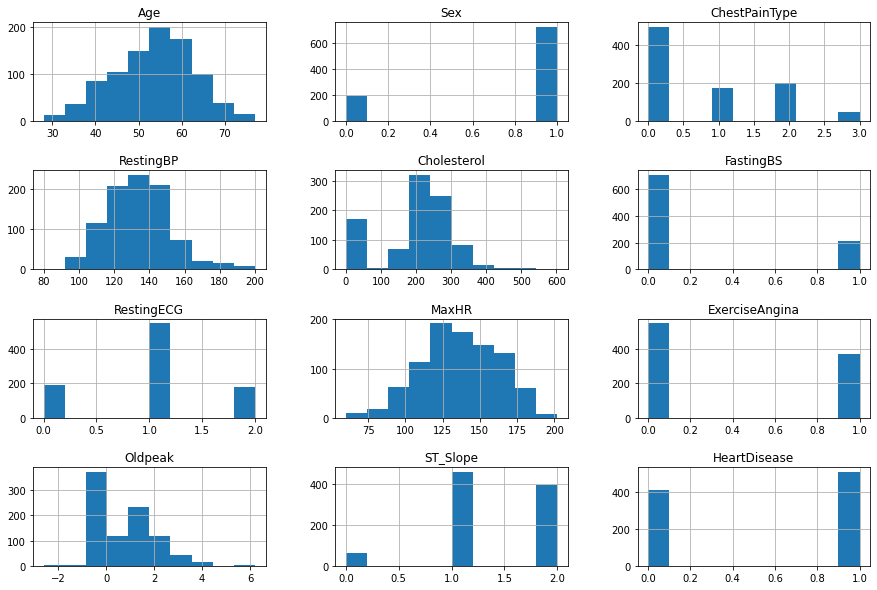

In [25]:
# Check whether data is sensible and if there's outliers
# via histograms
heart_new.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

- `Oldpeak` raises concern of outliers 
- We also need to check 'Cholesterol','RestingBP','MaxHR' for outliers

In [26]:
# Check any 'Oldpeak' (depression measure) values greater than 6
heart_new[heart_new['Oldpeak']>6]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
850,62,0,0,160,164,0,0,145,0,6.2,0,1


In [27]:
# We drop this row
heart_new = heart_new[heart_new['Oldpeak']<=6]

In [28]:
# Check if it is dropped
heart_new[heart_new['Oldpeak']>6]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [29]:
# Check high outliers for 'Cholesterol'
heart_new[heart_new['Cholesterol']>(heart_new['Cholesterol'].mean()+3*heart_new['Cholesterol'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,1,0,118,529,0,1,130,0,0.0,1,1
149,54,1,0,130,603,1,1,125,1,1.0,1,1
616,67,0,2,115,564,0,0,160,0,1.6,1,0


In [30]:
# Drop the outliers
heart_new = heart_new[heart_new['Cholesterol']<=(heart_new['Cholesterol'].mean()+3*heart_new['Cholesterol'].std())]

In [31]:
heart_new.shape

(913, 12)

In [32]:
# Check high outliers for 'RestingBP'
heart_new[heart_new['RestingBP']>(heart_new['RestingBP'].mean()+3*heart_new['RestingBP'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,1,1,190,241,0,1,106,0,0.0,2,0
241,54,1,0,200,198,0,1,142,1,2.0,1,1
365,64,0,0,200,0,0,1,140,1,1.0,1,1
399,61,1,2,200,0,1,2,70,0,0.0,1,1
592,61,1,0,190,287,1,0,150,1,2.0,0,1
732,56,0,0,200,288,1,0,133,1,4.0,0,1
759,54,1,1,192,283,0,0,195,0,0.0,2,1


In [33]:
# Drop the outliers
heart_new = heart_new[heart_new['RestingBP']<=(heart_new['RestingBP'].mean()+3*heart_new['RestingBP'].std())]

In [34]:
heart_new.shape

(906, 12)

In [35]:
# Check high outliers for 'MaxHR'
heart_new[heart_new['MaxHR']>heart_new['MaxHR'].mean()+3*heart_new['MaxHR'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [36]:
# Check low outliers for 'MaxHR'
heart_new[heart_new['MaxHR']<heart_new['MaxHR'].mean()-3*heart_new['MaxHR'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,1,0,140,0,0,1,60,0,0.0,1,1


In [37]:
# Drop the low outliers
heart_new = heart_new[heart_new['MaxHR']>heart_new['MaxHR'].mean()-3*heart_new['MaxHR'].std()]

In [38]:
heart_new.shape

(905, 12)

The new dataset contains 905 rows

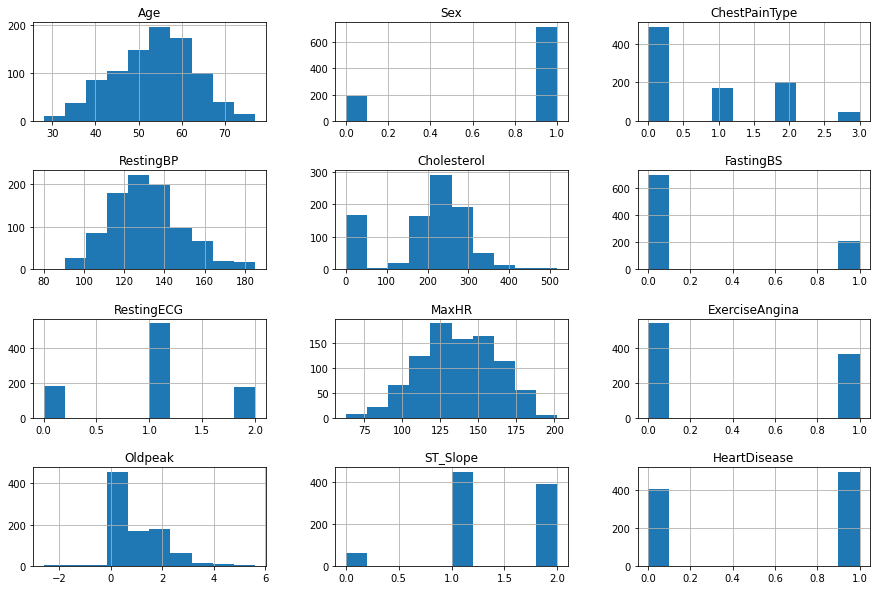

In [39]:
# Review new distributions
heart_new.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

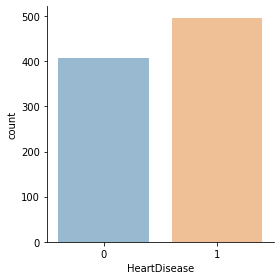

In [40]:
# Take a look at target feature: HeartDisease
sns.catplot(data=heart_new,x='HeartDisease',kind='count',alpha=0.5,height=4)

In [41]:
# Number of people not having heart diseases
len(heart_new[heart_new['HeartDisease']==0])

408

In [42]:
# # Number of people having heart diseases
len(heart_new[heart_new['HeartDisease']==1])

497

In [43]:
# # save the data
# datapath = '/Users/bq/Desktop/Bootcamp/Capstone_2/modified_data'
# save_file(heart_new, 'heart_data_wrangling.csv', datapath)

In [46]:
from pathlib import Path
datapath = Path('/Users/bq/Desktop/Bootcamp/Capstone_2/heart_data_wrangling.csv')
heart_new.to_csv(datapath)